# Final Project: Kobe Bryant Shot Selection

### Authors: April Kim, Jennifer Podracky, Shelly Hsu


## Business Understanding

Shot selection in basketball is a term that refers to the types of shots that an individual takes. This data is important for determining how the NBA invests in people and programs to measure and discover where on the court players shoot their best. Maximizing this probability is key to maximizing the best results while spending the minimum amount of resources. In this paper, we address the problem of predicting which of Kobe Bryant's shots will be made (or missed) using machine learning techniques utilizing the data that is provided at the level of every field goal attempted by Kobe Bryant during his 20-year career. This will provide valuable insight into what types of shots Kobe Bryant should have attempted more often to ensure the highest amount of points are scored during a game. 

## Data Understanding

### Background
The raw data sources provided are a CSV file. In this file, each of the rows represents a shot taken by Kobe Bryant over the course of the 1996-2016 seasons of his NBA career.

For each shot, the following attributes are recorded:

* action_type - Type of shot taken, e.g. Driving Dunk Shot
* combined_shot_type - More general type of shot taken, e.g. Dunk Shot
* game_event_id - Numeric id of the shot taken within the game
* game_id - Numeric id of the game in which the shot was taken
* lat - Latitude of the game location
* loc_x - Lateral location on the court at which shot was taken
* loc_y - Vertical location on the court at which shot was taken
* lon - Longitude of the game location
* minutes_remaining - Minutes remaining in the period in which the shot was taken
* period - A numeric indicator of which period that the shot was taken during
* playoffs - 0/1 flag indicating whether the game happened during the playoffs
* season - The season in which the game occured
* seconds_remaining - Seconds remaining for Kobe to shoot at the time the shot was taken
* shot_distance - Distance in feet from the basket at which shot was taken
* shot_made_flag - 0/1 flag indicating whether the shot was made or not
* shot_type - The type of shot that was made, e.g. 2PT Field Goal
* shot_zone_area - The court area from which the shot was taken, e.g. Center(C)
* shot_zone_basic - The court zone from which the shot was taken, e.g. Mid-Range
* shot_zone_range - The distance range from hich the shot was taken, e.g. 8-16 ft.
* team_id - Numeric ID of the team Kobe was playing for; always 1610612747 (Lakers)
* team_name - Name of the team Kobe was playing for; always the Lakers
* game_date - Date of the game in which shot was taken
* matchup - String indicating which two teams were playing each other
* opponent - Name of the team Kobe was playing against
* shot_id - Unique identifier for each shot

The variable that we are trying to predict through our analysis is shot_made_flag.


### Exploratory Data Analysis

In this section, we will load the provided CSV file, examine the provided variables, and analyze their distributions.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# force Pandas to display all columns
pd.set_option("display.max_columns", None)

In [3]:
# read in data
# data contains location and circumstances of every field goal attempted by Kobe
# using this data, predict whether the basket went in (shot_made_flag)
data = "data.csv"
sample_submission = "sample_submission.csv"

d = pd.read_csv(data)
sample = pd.read_csv(sample_submission)

In [4]:
# examine data
d.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


The provided data includes 24 explanatory variables and one dependent variable.

We look at some of the interesting variables.  

**Interesting variables:**  
    action_type  
    combined_shot_type  
    court location (loc_x and loc_y)
    minutes_remaining + seconds_remaining  
    period  
    playoffs  
    season  
    shot_distance  
    shot_type  
    shot_zone_area  
    shot_zone_basic  
    shot_zone_range  
    opponent
    game_date

In [5]:
d1 = d[["shot_made_flag", "action_type", "combined_shot_type", "loc_x", "loc_y", "minutes_remaining", "seconds_remaining", "period", "playoffs", "season", "shot_distance", "shot_type", "shot_zone_area", "shot_zone_basic", "shot_zone_range", "opponent", "game_date"]]

#### Action type

In [6]:
# number of different action types
len(d1["action_type"].unique())

57

In [7]:
d1["action_type"].value_counts().head(10)

Jump Shot                   18880
Layup Shot                   2567
Driving Layup Shot           1978
Turnaround Jump Shot         1057
Fadeaway Jump Shot           1048
Running Jump Shot             926
Pullup Jump shot              476
Turnaround Fadeaway shot      439
Slam Dunk Shot                411
Reverse Layup Shot            395
Name: action_type, dtype: int64

In [8]:
d1["action_type"].value_counts().tail(10)

Running Pull-Up Jump Shot             4
Running Finger Roll Shot              4
Turnaround Finger Roll Shot           2
Tip Layup Shot                        2
Running Tip Shot                      2
Putback Slam Dunk Shot                2
Driving Floating Bank Jump Shot       1
Turnaround Fadeaway Bank Jump Shot    1
Running Slam Dunk Shot                1
Cutting Finger Roll Layup Shot        1
Name: action_type, dtype: int64

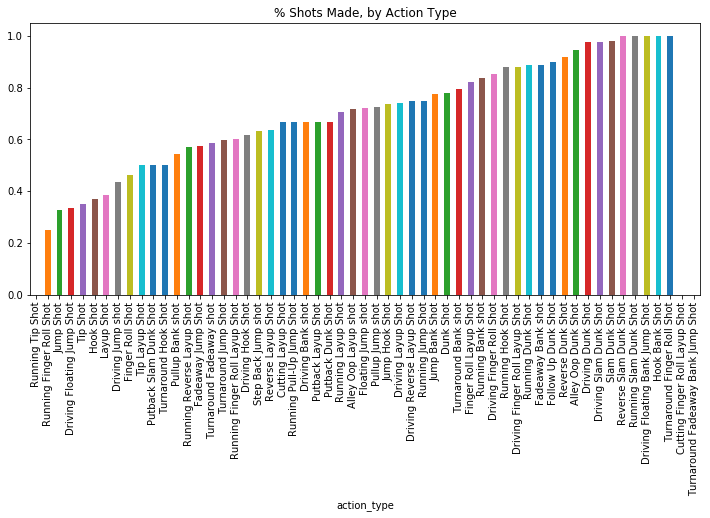

In [9]:
# bar plot of counts of different action types
d1["shot_made_flag"].groupby(d1["action_type"]).mean().sort_values().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Action Type")
plt.show()

We observe that there are many values of action types with very low counts, which makes it difficult to compare them. To mitigate this, we group all action_type values with fewer than 20 occurrances as "Other Shot".

In [10]:
action_type_counts = d1["action_type"].value_counts()
d1.loc[d1["action_type"].isin(action_type_counts.index[action_type_counts<20]), 'action_type'] = "Other Shot"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# fewer action types compared to original 57
len(d1["action_type"].unique())

34

We can then analyze the average made percentage for each action type.

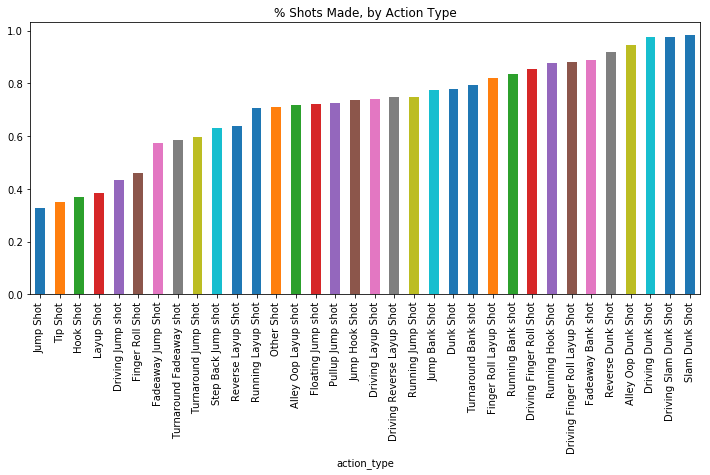

In [12]:
# sorted by least accurate action type to most accurate
d1["shot_made_flag"].groupby(d1["action_type"]).mean().sort_values().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Action Type")
plt.show()

We observe that there does seem to be a correlation between shot_made_flag and action_type, in that certain types of shots are successfully made more often than other types of shots.

#### Combined shot type

In [13]:
# number of different combined shot types
len(d1["combined_shot_type"].unique())

6

In [14]:
d1["combined_shot_type"].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

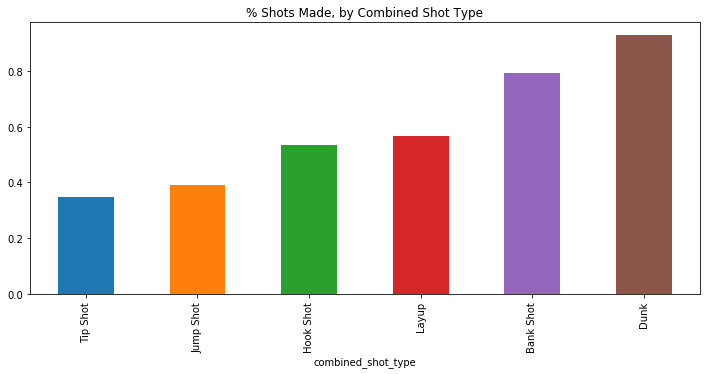

In [15]:
# we look at how many shots were made on average of each combined shot type
# sorted by least accurate action type to most accurate
d1["shot_made_flag"].groupby(d1["combined_shot_type"]).mean().sort_values().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Combined Shot Type")
plt.show()

Similar to action_type, we observe some correlation between shot_made_flag and combined_shot_type. This makes intuitive sense, as combined_shot_type is a summarized form of action_type. Specifically, Kobe made Dunk and Bank Shots more frequently than Tip Shots or Jump Shots.

#### Loc x and loc y

We can visualize the locations on the court where shots were made or not made using loc_x and loc_y. In the below plots, made shots are red and missed shots are blue.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


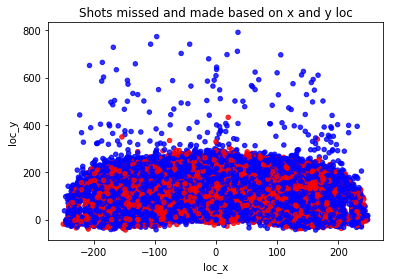

In [16]:
# loc_x = left-right along the endline with 0 centered at the basket)
# loc_y  = positive towards halfcourt with 0 being the basket)
cmap = plt.cm.get_cmap('bwr')
plt.figure(figsize=(7,5))
d1.plot(x="loc_x", y="loc_y", kind='scatter', c = d1["shot_made_flag"].map(cmap), alpha=0.8).set_title("Shots missed and made based on x and y loc")
plt.show()

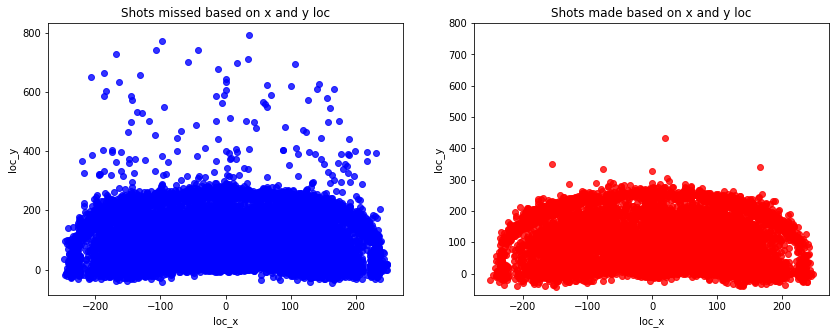

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(d1["loc_x"][d1['shot_made_flag']==0], d1["loc_y"][d1['shot_made_flag']==0], c = 'b', alpha=0.8)
plt.xlabel("loc_x")
plt.ylabel("loc_y")
plt.title("Shots missed based on x and y loc")
plt.subplot(1,2,2)
plt.scatter(d1["loc_x"][d1['shot_made_flag']==1], d1["loc_y"][d1['shot_made_flag']==1], c = 'r', alpha=0.8)
plt.ylim(ymax=800)
plt.xlabel("loc_x")
plt.ylabel("loc_y")
plt.title("Shots made based on x and y loc")
plt.show()

We observe that location does impact likelihood of making a shot. We can derive a new feature, loc_cluster, by clustering the shot locations into 10 groups using GM modeling.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'Location Clusters')

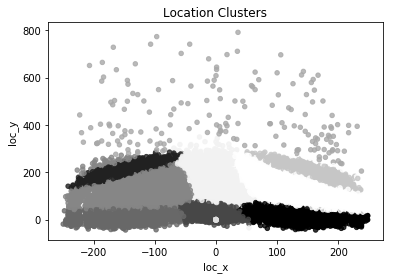

In [18]:
## location matters especially when Kobe is far from the basket
# group coordinates into clusters using GMM
loc_x_y = GaussianMixture(n_components=10, covariance_type="full")
loc_x_y.fit(d1.loc[:,("loc_x", "loc_y")])
d1.loc[:,"loc_cluster"] = loc_x_y.predict(d1.loc[:,("loc_x", "loc_y")])
d1.plot(x="loc_x", y="loc_y", kind='scatter', c = d1["loc_cluster"], alpha=0.8).set_title("Location Clusters")

There does appear to be a relationship between court location and shot_made_flag. Specifically, shots taken farther from the basket are less likely to make it in than closer shots.

#### Minutes remaining + seconds remaining

We combined minutes_remaining and seconds_remaining to get the total time remaining in the current period.

In [19]:
# combine two time variables as total seconds
d1.loc[:,"time_remaining"] = (d1.loc[:,"minutes_remaining"]*60) + d1.loc[:,"seconds_remaining"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


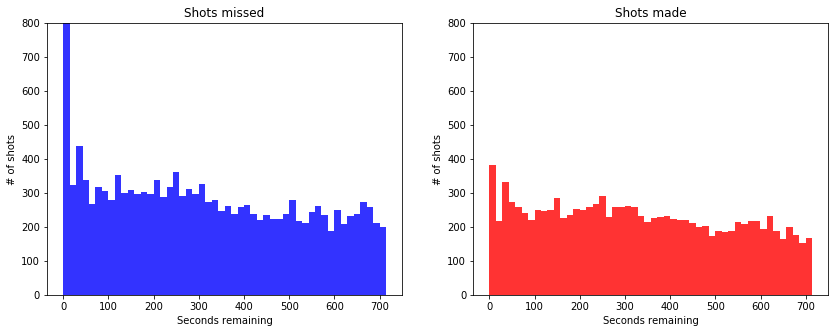

In [20]:
# we look at how many shots were made with how many seconds remaining in the game
# sorted by least accurate action type to most accurate
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(d1["time_remaining"][d1['shot_made_flag']==0], bins = 50, color = 'b', alpha=0.8)
plt.ylim(ymax=800)
plt.xlabel("Seconds remaining")
plt.ylabel("# of shots")
plt.title("Shots missed")
plt.subplot(1,2,2)
plt.hist(d1["time_remaining"][d1['shot_made_flag']==1], bins = 50, color = 'r', alpha=0.8)
plt.ylim(ymax=800)
plt.xlabel("Seconds remaining")
plt.ylabel("# of shots")
plt.title("Shots made")
plt.show()

There appears to be a correlation between time remaining and whether or not the basket is made, _especially_ when the time remaining is very small (< 30 seconds).

We can create a new boolean variable to indicate whether or not the shot was taken in the last 3 seconds of the period.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5,1,'% Shots Made, if made in last 30 seconds')

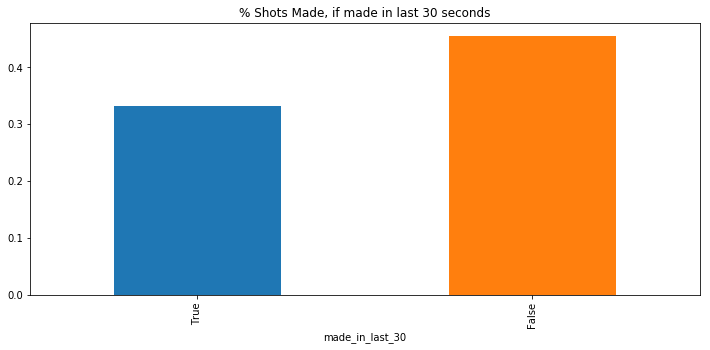

In [21]:
d1.loc[:,'made_in_last_30'] = d1.loc[:,'time_remaining']<=30
d1["shot_made_flag"].groupby(d1["made_in_last_30"]).mean().sort_values().plot.bar(figsize=(12,5)).set_title("% Shots Made, if made in last 30 seconds")

#### Playoffs

Text(0.5,1,'% Shots Made, by Game Playoffs Status')

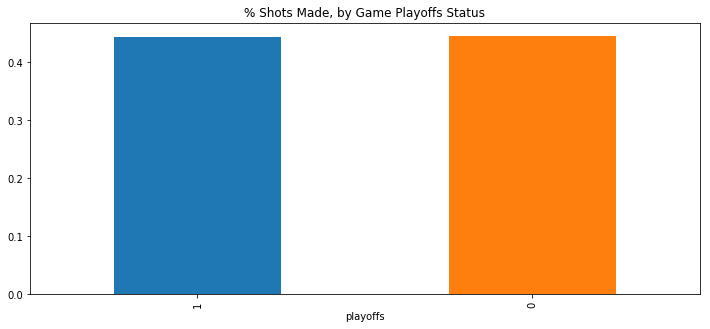

In [22]:
d1["shot_made_flag"].groupby(d1["playoffs"]).mean().sort_values().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Game Playoffs Status")


There does not appear to be any correlation between shot_made_flag and playoffs.

#### Period

In [23]:
d1["period"].value_counts().sort_values()

7       7
6      38
5     330
2    6718
4    7260
1    8048
3    8296
Name: period, dtype: int64

Basketball games are played on four quarters/periods but we see that the data has records up to the 7th period.

We can assume that periods 5-7 are overtime periods, which last about half the time of regular periods. It also makes sense that there are significantly fewer shots taken in periods 5-7 above. 

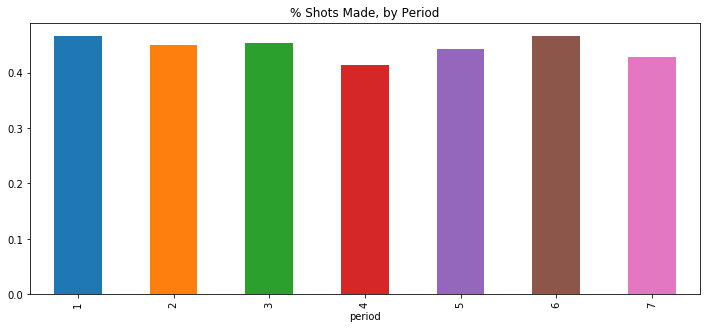

In [24]:
d1["shot_made_flag"].groupby(d1["period"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Period")
plt.show()

There does not appear to be a relationship between period and shot_made_flag.

#### Season

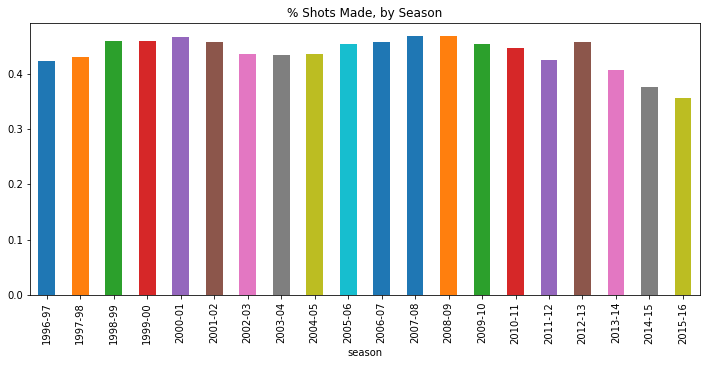

In [25]:
# we look at how many shots were made on average during each season Kobe played
d1["shot_made_flag"].groupby(d1["season"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Season")
plt.show()


We see a gradual decrease in average baskets made per season towards the last few years before his retirement. Kobe has previously said in interviews that 2012-13 season was his greatest and the season that marked the beginning of the end of his career, which is represented correctly in the plot above. Prior to that, Kobe was quite consistent throughout his career.

#### Shot distance

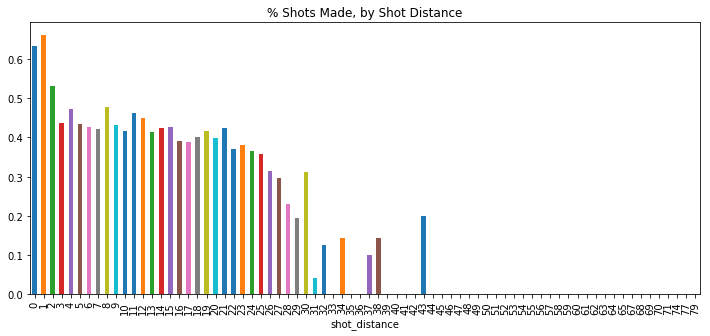

In [26]:
# we look at how many shots were made on average at different distance
d1["shot_made_flag"].groupby(d1["shot_distance"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Shot Distance")
plt.show()


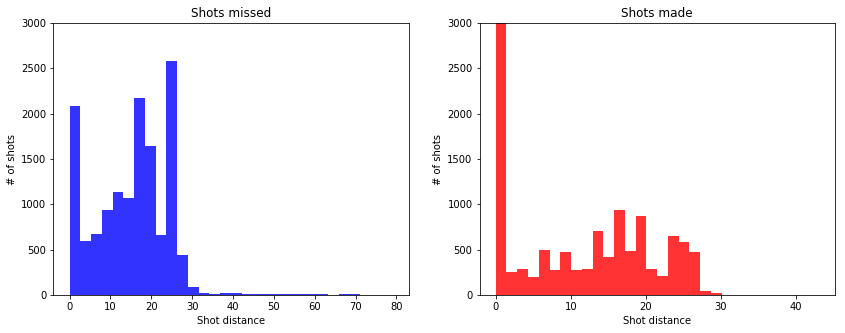

In [27]:
# we also look at how many shots were made from differnet distances from the net
# sorted by least accurate action type to most accurate
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(d1["shot_distance"][d1['shot_made_flag']==0], bins = 30, color = 'b', alpha=0.8)
plt.ylim(ymax=3000)
plt.xlabel("Shot distance")
plt.ylabel("# of shots")
plt.title("Shots missed")
plt.subplot(1,2,2)
plt.hist(d1["shot_distance"][d1['shot_made_flag']==1], bins = 30, color = 'r', alpha=0.8)
plt.ylim(ymax=3000)
plt.xlabel("Shot distance")
plt.ylabel("# of shots")
plt.title("Shots made")
plt.show()

In general, shots made and shots missed appear to follow a similar distribution. However, smaller shot distances generally correlate with a higher shot made percentage.

#### Shot zone area

In [28]:
# number of different combined shot types
len(d1["shot_zone_area"].unique())

6

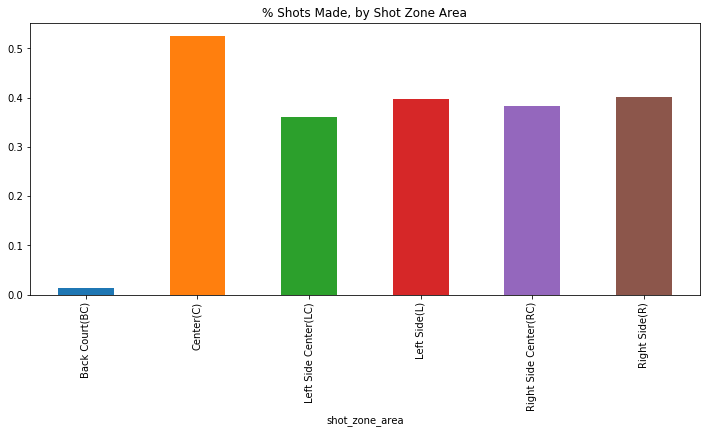

In [29]:
d1["shot_made_flag"].groupby(d1["shot_zone_area"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Shot Zone Area")
plt.show()

We observe a correlation between shot_made_flag and shot_zone_area. Specifically, Kobe was historically much less likely to make a shot from the Back Court than from the other shot zone areas.

#### Shot zone basic

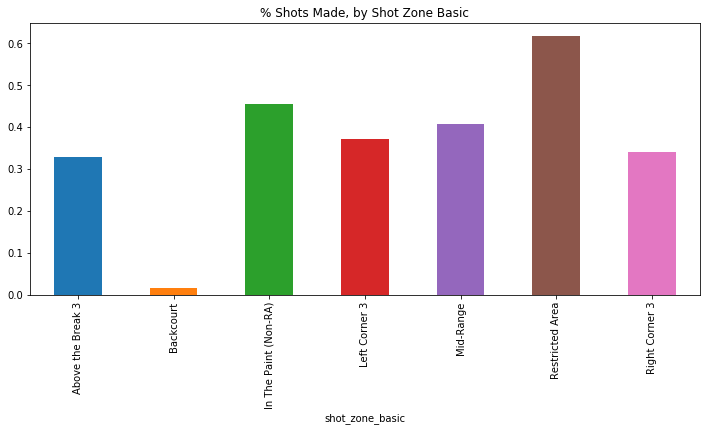

In [30]:
d1["shot_made_flag"].groupby(d1["shot_zone_basic"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Shot Zone Basic")
plt.show()

Again, we observe a correlation between shot_made_flag and shot_zone_basic. This variable is very similar to shot_zone_area. Specifically, Kobe was historically much less likely to make a shot from the Back Court than from the other shot zone areas.

#### Shot zone range

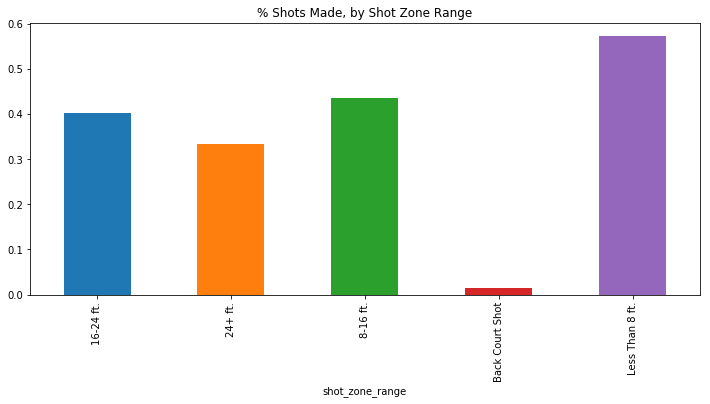

In [31]:
## bar plot of counts of different combined shot types 
d1["shot_made_flag"].groupby(d1["shot_zone_range"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Shot Zone Range")
plt.show()

We again observe correlation between shot_made_flag and shot_zone_range, which is a bucketed version of the shot_distance variable. We again see that shots made closer to the basket are more likely to be made.

#### Opponent

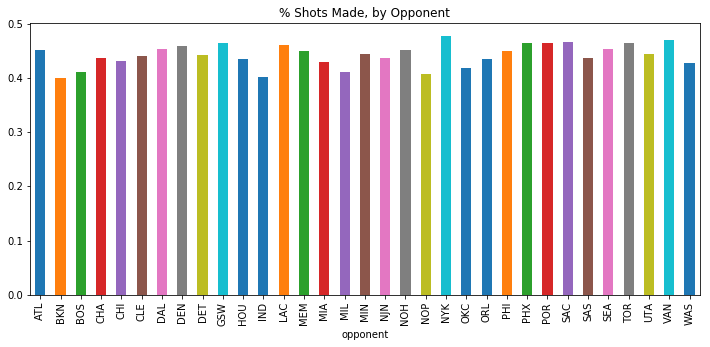

In [32]:
## bar plot of counts of different opponents
d1["shot_made_flag"].groupby(d1["opponent"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Opponent")
plt.show()

We do not observe a strong correlation between shot_made_flag and shot_zone_range.

#### Game Date

From game_date, we can derive a couple of additional features:
* Weekday (Monday, Tuesday, etc)
* Month

In [33]:
game_date_converted = []
game_weekday = []
game_month = []
for i in range(0, d1.shape[0]):
    game_date_converted.append(datetime.strptime(d1["game_date"][i], '%Y-%m-%d'))
    game_weekday.append(game_date_converted[i].weekday())
    game_month.append(game_date_converted[i].month)
d1['game_weekday'], d1['game_month'] = game_weekday, game_month
d1.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,shot_made_flag,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_date,loc_cluster,time_remaining,made_in_last_30,game_weekday,game_month
0,NaN,Jump Shot,Jump Shot,167,72,10,27,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,2000-10-31,0,627,False,1,10
1,0.0,Jump Shot,Jump Shot,-157,0,10,22,1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000-10-31,6,622,False,1,10
2,1.0,Jump Shot,Jump Shot,-101,135,7,45,1,0,2000-01,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000-10-31,5,465,False,1,10
3,0.0,Jump Shot,Jump Shot,138,175,6,52,1,0,2000-01,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000-10-31,0,412,False,1,10
4,1.0,Driving Dunk Shot,Dunk,0,0,6,19,2,0,2000-01,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,2000-10-31,2,379,False,1,10


Text(0.5,1,'% Shots Made, by Game Weekday')

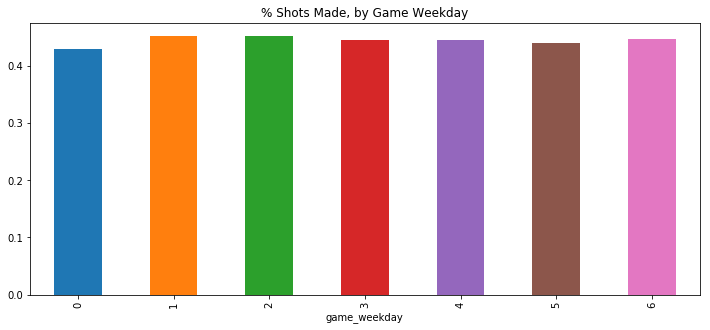

In [34]:
d1["shot_made_flag"].groupby(d1["game_weekday"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Game Weekday")


Text(0.5,1,'% Shots Made, by Game Month')

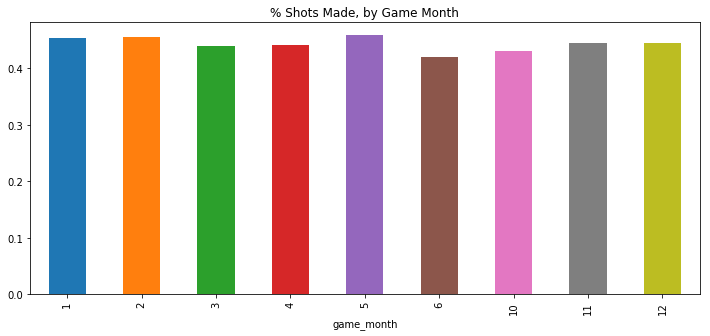

In [35]:
d1["shot_made_flag"].groupby(d1["game_month"]).mean().plot.bar(figsize=(12,5)).set_title("% Shots Made, by Game Month")


There does not appear to be any relationship between game weekday and shot_made_flag. There is some correlation between game month and shot_made_flag, but not by much.

## Data Preparation

To prepare the data for analysis, we will first have to convert the categorical variables into numeric form so that they can be fed to algorithms. We will then have to divide the data into the appropriate training, development, and test sets.

### Transformations

In [36]:
d1.head(5)

,shot_made_flag,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_date,loc_cluster,time_remaining,made_in_last_30,game_weekday,game_month
0,NaN,Jump Shot,Jump Shot,167,72,10,27,1,0,2000-01,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,2000-10-31,0,627,False,1,10
1,0.0,Jump Shot,Jump Shot,-157,0,10,22,1,0,2000-01,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2000-10-31,6,622,False,1,10
2,1.0,Jump Shot,Jump Shot,-101,135,7,45,1,0,2000-01,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,2000-10-31,5,465,False,1,10
3,0.0,Jump Shot,Jump Shot,138,175,6,52,1,0,2000-01,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,2000-10-31,0,412,False,1,10
4,1.0,Driving Dunk Shot,Dunk,0,0,6,19,2,0,2000-01,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,2000-10-31,2,379,False,1,10


In [37]:
# convert type object to categorical 
to_convert = d1.select_dtypes(["object"]).columns
for col in to_convert:
    d1.loc[:,col] = d1.loc[:,col].astype('category')
# convert categorical to numerical values
d1.loc[:,to_convert] = d1.loc[:,to_convert].apply(lambda x: x.cat.codes)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
d1.dtypes

shot_made_flag        float64
action_type              int8
combined_shot_type       int8
loc_x                   int64
loc_y                   int64
minutes_remaining       int64
seconds_remaining       int64
period                  int64
playoffs                int64
season                   int8
shot_distance           int64
shot_type                int8
shot_zone_area           int8
shot_zone_basic          int8
shot_zone_range          int8
opponent                 int8
game_date               int16
loc_cluster             int64
time_remaining          int64
made_in_last_30          bool
game_weekday            int64
game_month              int64
dtype: object

In [39]:
d1.shape

(30697, 22)

In [40]:
d1.head(5)

,shot_made_flag,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,seconds_remaining,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,game_date,loc_cluster,time_remaining,made_in_last_30,game_weekday,game_month
0,NaN,18,3,167,72,10,27,1,0,4,18,0,5,4,0,25,310,0,627,False,1,10
1,0.0,18,3,-157,0,10,22,1,0,4,15,0,3,4,2,25,310,6,622,False,1,10
2,1.0,18,3,-101,135,7,45,1,0,4,16,0,2,4,0,25,310,5,465,False,1,10
3,0.0,18,3,138,175,6,52,1,0,4,22,0,4,4,0,25,310,0,412,False,1,10
4,1.0,2,1,0,0,6,19,2,0,4,0,0,1,5,4,25,310,2,379,False,1,10


In [41]:
# drop unused columns/variables that were transformed
d1.drop("minutes_remaining", 1, inplace=True)
d1.drop("seconds_remaining", 1, inplace=True)
d1.drop("game_date", 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [42]:
d1.head(5)

,shot_made_flag,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,loc_cluster,time_remaining,made_in_last_30,game_weekday,game_month
0,NaN,18,3,167,72,1,0,4,18,0,5,4,0,25,0,627,False,1,10
1,0.0,18,3,-157,0,1,0,4,15,0,3,4,2,25,6,622,False,1,10
2,1.0,18,3,-101,135,1,0,4,16,0,2,4,0,25,5,465,False,1,10
3,0.0,18,3,138,175,1,0,4,22,0,4,4,0,25,0,412,False,1,10
4,1.0,2,1,0,0,2,0,4,0,0,1,5,4,25,2,379,False,1,10


### Test, train, dev datasets

In [43]:
## create test dataset
d2 = d1[pd.notnull(d1['shot_made_flag'])]
X = d2.drop('shot_made_flag', 1)
Y = d2['shot_made_flag']

test = d1[pd.isnull(d1['shot_made_flag'])]
test = test.drop('shot_made_flag', 1)

## create train and dev datasets
## shuffle dataframe rows

## Shuffle the input
np.random.seed(50)
shuffle = d1.sample(frac=1)
d2_shuffle = shuffle[pd.notnull(shuffle['shot_made_flag'])]
X_shuffle = d2_shuffle.drop('shot_made_flag', 1)
Y_shuffle = d2_shuffle['shot_made_flag']

## create train and test set
X_train, Y_train = X_shuffle.iloc[:20697], Y_shuffle.iloc[:20697]
X_dev, Y_dev = X_shuffle.iloc[20697:], Y_shuffle.iloc[20697:]

print(X_train.shape)
print(X_dev.shape)

train_data, train_labels = X_train.values, Y_train.values
dev_data, dev_labels = X_dev.values, Y_dev.values

(20697, 18)
(5000, 18)


In [44]:
print(train_data[:5,:])

[[6 4 0 0 1 0 2 0 0 1 5 4 6 2 115 False 0 3]
 [18 3 -6 149 1 1 3 14 0 1 4 2 25 1 587 False 6 5]
 [18 3 43 207 1 0 5 21 0 1 4 0 13 0 373 False 4 12]
 [18 3 67 40 3 1 6 7 0 1 2 4 16 9 448 False 6 4]
 [13 4 35 26 1 0 5 4 0 1 2 4 16 7 112 False 3 4]]


## Modeling

### Logistic Regression

In [45]:
## Logistic regression model
lr_model = LogisticRegression(penalty="l2")
Cs = {"C": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]}
## use grid search to try different C values
gs_lr = GridSearchCV(lr_model, Cs)
gs_lr.fit(train_data, train_labels)
print ("Logistic Regression Model:")
print ("Optimal C = {}; best LR score = {:.3}\n".format(gs_lr.best_params_, gs_lr.best_score_) )
## using optimal C
lr_model_optimal = LogisticRegression(C=gs_lr.best_params_["C"])
lr_model_optimal.fit(train_data, train_labels)
predicted_dev = lr_model_optimal.predict(dev_data)
kaggle_submission = lr_model_optimal.predict_proba(test)
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == predicted_dev)) )

Logistic Regression Model:
Optimal C = {'C': 0.1}; best LR score = 0.607

Accuracy with dev data = 0.615


In [46]:
## Kaggle submission score for logistic regression: 0.74563

### BernoulliNB

In [47]:
## BernoulliNB model with default
bernoulli_model = BernoulliNB()
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
## perform search using GridSearchCV in Bernoulli NB model
gs_b = GridSearchCV(bernoulli_model, alphas)
## fit the model with mini training set
gs_b.fit(train_data, train_labels)
print ("BernoulliNB Model:")
print ("Optimal alpha = {}; best BernoulliNB score = {:.3}\n".format(gs_b.best_params_, gs_b.best_score_) )
## using optimal alpha
b_model_optimal = BernoulliNB(alpha=gs_b.best_params_['alpha'])
b_model_optimal.fit(train_data, train_labels)
predicted_dev = b_model_optimal.predict(dev_data)
kaggle_submission = b_model_optimal.predict_proba(dev_data)
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == predicted_dev)) )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB Model:
Optimal alpha = {'alpha': 10.0}; best BernoulliNB score = 0.596

Accuracy with dev data = 0.599


In [48]:
## Kaggle submission score for BernoulliNB: 0.78988

### K Nearest Neighbors

In [49]:
## KNN classifier
knn_model = KNeighborsClassifier()
k_values = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] }
## use grid search to try different # of neighbors
gs_knn = GridSearchCV(knn_model, k_values)
gs_knn.fit(train_data, train_labels) 
print ("K-Nearest Neighbors Classifier:" )
print ("Optimal k = {}; best KNN score = {:.3}\n".format(gs_knn.best_params_, gs_knn.best_score_) )
# using most optimal k value, report f1 score
knn_model_optimal = KNeighborsClassifier(n_neighbors=gs_knn.best_params_["n_neighbors"])
knn_model_optimal.fit(train_data, train_labels)
predicted_dev = knn_model_optimal.predict(dev_data)
kaggle_submission = knn_model_optimal.predict_proba(dev_data)
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == predicted_dev)) )

K-Nearest Neighbors Classifier:
Optimal k = {'n_neighbors': 14}; best KNN score = 0.598

Accuracy with dev data = 0.608


In [50]:
## Kaggle submission score for KNN classifier: 1.22009

### Gradient Boosted Decision Trees

In [51]:
## Gradient Boosted Decision Trees
gb_model = GradientBoostingClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
gs_gb = GridSearchCV(gb_model, param_grid)
gs_gb.fit(train_data, train_labels)
print ("Gradient Boosted Decision Trees:")
print ("Optimal parameters = {}; best GB score = {:.3}\n".format(gs_gb.best_params_, gs_gb.best_score_) )
gb_model_optimal = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gb_model_optimal.fit(train_data, train_labels)
predicted_dev = gb_model_optimal.predict(dev_data)
kaggle_submission = gb_model_optimal.predict_proba(dev_data)
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == predicted_dev)) )

Gradient Boosted Decision Trees:
Optimal parameters = {'learning_rate': 0.1, 'n_estimators': 100}; best GB score = 0.678

Accuracy with dev data = 0.691


In [52]:
## Kaggle submission score for gradient boosted decision trees: 0.80514

### Gaussian Mixture Model

2


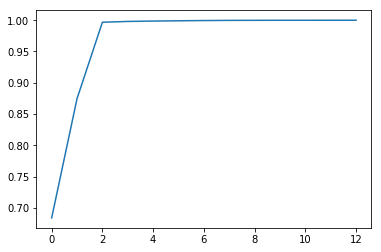

In [53]:
## GMM Model

# Determine appropriate PCA component count
pca = PCA(n_components=13)
pca.fit(train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
print (np.sum(np.cumsum(pca.explained_variance_ratio_) < .9))

In [54]:
# ideal # components looks like 3-4
num_comp = 3

# project training and dev data to 3d
pca = PCA(n_components=num_comp)
pca.fit(train_data)
train_3d = pca.transform(train_data)
dev_3d = pca.transform(dev_data)
train_3d[:5,:]


array([[-202.66848097,    4.17330375, -101.0984877 ],
       [ 262.49722747,   16.95784875,   68.34409416],
       [  46.4672063 ,  -31.95002564,  118.85777737],
       [ 128.65830235,  -59.59796485,  -44.78611596],
       [-206.59734351,  -30.13536333,  -74.07261633]])

In [55]:
## perform search using GridSearchCV for GaussianMixture model
gmm_model = GaussianMixture()
comps = [1, 2, 3, 4]
structures = ['spherical', 'tied', 'diag', 'full']
param_grid = dict(n_components=comps, covariance_type=structures)
gs_gmm = GridSearchCV(gmm_model, param_grid)
gs_gmm.fit(train_3d, train_labels)
print ("Gaussian Mixture Models:")
print ("Optimal parameters = {}; best GMM score = {:.3}\n".format(gs_gmm.best_params_, gs_gmm.best_score_) )
## using optimal number of components and covariance type
gmm_optimal = GaussianMixture(n_components=gs_gmm.best_params_["n_components"], covariance_type=gs_gmm.best_params_["covariance_type"])
gmm_optimal.fit(train_3d, train_labels)
predicted_dev = gmm_optimal.predict(dev_3d)
kaggle_submission = gmm_optimal.predict_proba(dev_3d)
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == predicted_dev)) )

Gaussian Mixture Models:
Optimal parameters = {'covariance_type': 'full', 'n_components': 4}; best GMM score = -18.6

Accuracy with dev data = 0.238


In [59]:
## Best-of GMM
train_3d_pos = pca.transform(train_data[train_labels==1])
train_3d_neg = pca.transform(train_data[train_labels==0])

## Create one GMM model for the positive examples, and one for negative
gmm_mod_pos = GaussianMixture(n_components=gs_gmm.best_params_["n_components"], covariance_type=gs_gmm.best_params_["covariance_type"])
gmm_mod_pos.fit(train_3d_pos)
gmm_mod_neg = GaussianMixture(n_components=gs_gmm.best_params_["n_components"], covariance_type=gs_gmm.best_params_["covariance_type"])
gmm_mod_neg.fit(train_3d_neg)

pred = np.empty([dev_3d.shape[0],1])
kaggle_submission = np.empty([dev_3d.shape[0],3])
for i in range(0, len(dev_3d)):
    record = dev_3d[i].reshape(1, -1)
    if np.exp(gmm_mod_pos.score(record)) > np.exp(gmm_mod_neg.score(record)):
        pred[i] = 1
    else: 
        pred[i] = 0
    
# compute accuracy
print ("Accuracy with dev data = {:.3}".format(np.mean(dev_labels == pred)) )

Accuracy with dev data = 0.511


## Evaluation

From the above models, we have selected the XXX model.

[Accuracy]
[Other metrics of goodness]
[AB test results?]

## Deployment

To deploy the model, the predicted probablities for the data missing 'shot_made_flag' are written to a CSV file. This file is uploaded to Kaggle and automatically scored.

In [ ]:
sample['shot_made_flag'] = kaggle_submission
sample.to_csv("submission.csv", index=False)

Our final Kaggle score was XXX.

[Screenshot]